In [180]:
import pandas as pd

In [181]:
import numpy as np

In [182]:
import re

## Names of the Columns are present in spambase.names file present in Data folder

In [183]:
cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report','word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'classified']

In [184]:
data = pd.read_csv('Data\spambase.data', names=cols, header=None)
X = data.iloc[:, :-1]
y = data.classified
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,classified
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


        y variable contains whether a particular sample is spam or not.
        1 - Spam 0 - Not a Spam

In [185]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: classified, Length: 4601, dtype: int64

In [186]:
y.size

4601

X is a dataframe without target variable

In [187]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [188]:
X.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [189]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [190]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [191]:
X.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [194]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)

In [195]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=0)

In [196]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.15, random_state=0)

In [197]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

predicted = mnb.predict(X_test)

score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

Accuracy Score: 
 80.95582910934105


In [198]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb1 = MultinomialNB()
mnb1.fit(X_train1, y_train1)

predicted1 = mnb1.predict(X_test1)

score = accuracy_score(y_test1, predicted1)
print('Accuracy Score: \n', (100*score))

Accuracy Score: 
 81.21606948968513


In [199]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb2 = MultinomialNB()
mnb2.fit(X_train2, y_train2)

predicted2 = mnb2.predict(X_test2)

score = accuracy_score(y_test2, predicted2)
print('Accuracy Score: \n', (100*score))

Accuracy Score: 
 79.93049522154648


In [200]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb3 = MultinomialNB()
mnb3.fit(X_train3, y_train3)

predicted3 = mnb3.predict(X_test3)

score = accuracy_score(y_test3, predicted3)
print('Accuracy Score: \n', (100*score))

Accuracy Score: 
 80.60781476121564


## Accuracy is best when the train test split is 80/20 percent 

In [201]:
from sklearn.model_selection import cross_val_score
np.average(cross_val_score(mnb, X_train, y_train, cv=10, scoring="accuracy"))

0.8009316770186337

In [202]:
from sklearn.model_selection import cross_val_score
np.average(cross_val_score(mnb1, X_train1, y_train1, cv=10, scoring="accuracy"))

0.8013586956521739

In [203]:
from sklearn.model_selection import cross_val_score
np.average(cross_val_score(mnb2, X_train2, y_train2, cv=10, scoring="accuracy"))

0.8008695652173913

In [204]:
from sklearn.model_selection import cross_val_score
np.average(cross_val_score(mnb3, X_train3, y_train3, cv=10, scoring="accuracy"))

0.7956521739130435

## Lets draw Confusion matrix for the same

In [205]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
from sklearn.metrics import classification_report as cr

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       538
           1       0.78      0.77      0.77       383

    accuracy                           0.81       921
   macro avg       0.81      0.81      0.81       921
weighted avg       0.81      0.81      0.81       921



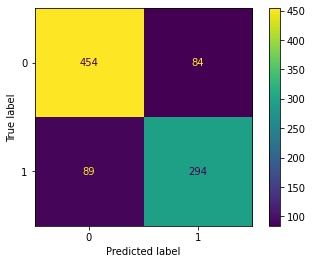

In [206]:
print(cr(y_test1, predicted1))
cm1 = confusion_matrix(y_test1, predicted1)
cm_display = ConfusionMatrixDisplay(cm1).plot()

In [207]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

predicted = svm_clf.predict(X_test)

score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

Accuracy Score: 
 83.2729905865315


In [208]:
svm_clf1 = SVC(gamma="auto")
svm_clf1.fit(X_train1, y_train1)

predicted1 = svm_clf1.predict(X_test1)

score1 = accuracy_score(y_test1, predicted1)
print('Accuracy Score: \n', (100*score1))

Accuracy Score: 
 83.38762214983714


In [209]:
svm_clf2 = SVC(gamma="auto")
svm_clf2.fit(X_train2, y_train2)

predicted2 = svm_clf2.predict(X_test2)

score2 = accuracy_score(y_test2, predicted2)
print('Accuracy Score: \n', (100*score2))

Accuracy Score: 
 83.66637706342311


In [210]:
svm_clf3 = SVC(gamma="auto")
svm_clf3.fit(X_train3, y_train3)

predicted3 = svm_clf3.predict(X_test3)

score3 = accuracy_score(y_test3, predicted3)
print('Accuracy Score: \n', (100*score3))

Accuracy Score: 
 82.77858176555716


              precision    recall  f1-score   support

           0       0.86      0.87      0.87       691
           1       0.80      0.78      0.79       460

    accuracy                           0.84      1151
   macro avg       0.83      0.83      0.83      1151
weighted avg       0.84      0.84      0.84      1151



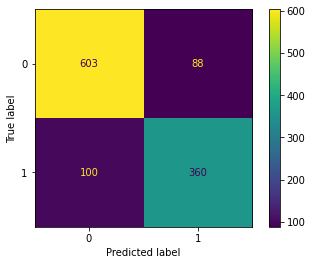

In [211]:
print(cr(y_test2, predicted2))
cm2 = confusion_matrix(y_test2, predicted2)
cm_display = ConfusionMatrixDisplay(cm2).plot()

In [212]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=120, use_label_encoder = False)
xgb.fit(X_train, y_train)

predictedxgb = xgb.predict(X_test)

scorexgb = accuracy_score(y_test, predictedxgb)
print('Accuracy Score: \n', (100*scorexgb))

[23:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 
 95.07603186097032


In [213]:
xgb1 = XGBClassifier(n_estimators=120, use_label_encoder = False)
xgb1.fit(X_train1, y_train1)

predictedxgb1 = xgb1.predict(X_test1)

scorexgb1 = accuracy_score(y_test1, predictedxgb1)
print('Accuracy Score: \n', (100*scorexgb1))

[23:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 
 94.89685124864278


In [214]:
xgb2 = XGBClassifier(n_estimators=120, use_label_encoder = False)
xgb2.fit(X_train2, y_train2)

predictedxgb2 = xgb2.predict(X_test2)

scorexgb2 = accuracy_score(y_test2, predictedxgb2)
print('Accuracy Score: \n', (100*scorexgb2))

[23:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 
 94.5264986967854


In [215]:
xgb3 = XGBClassifier(n_estimators=120, use_label_encoder = False)
xgb3.fit(X_train3, y_train3)

predictedxgb3 = xgb3.predict(X_test3)

scorexgb3 = accuracy_score(y_test3, predictedxgb3)
print('Accuracy Score: \n', (100*scorexgb3))

[23:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 
 94.93487698986975


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       822
           1       0.95      0.93      0.94       559

    accuracy                           0.95      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381



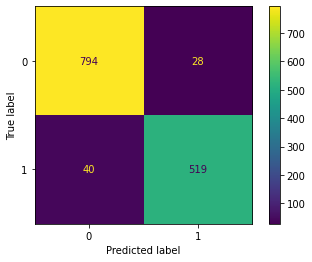

In [216]:
print(cr(y_test, predictedxgb))
cm = confusion_matrix(y_test, predictedxgb)
cm_display = ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       538
           1       0.95      0.93      0.94       383

    accuracy                           0.95       921
   macro avg       0.95      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



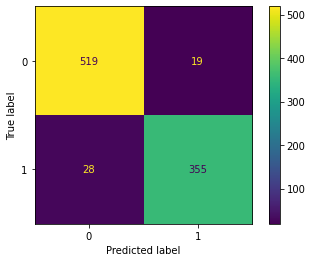

In [217]:
print(cr(y_test1, predictedxgb1))
cm1 = confusion_matrix(y_test1, predictedxgb1)
cm_display = ConfusionMatrixDisplay(cm1).plot()

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       691
           1       0.95      0.91      0.93       460

    accuracy                           0.95      1151
   macro avg       0.95      0.94      0.94      1151
weighted avg       0.95      0.95      0.95      1151



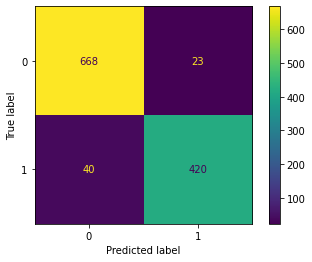

In [218]:
print(cr(y_test2, predictedxgb2))
cm2 = confusion_matrix(y_test2, predictedxgb2)
cm_display = ConfusionMatrixDisplay(cm2).plot()

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       407
           1       0.95      0.93      0.94       284

    accuracy                           0.95       691
   macro avg       0.95      0.95      0.95       691
weighted avg       0.95      0.95      0.95       691



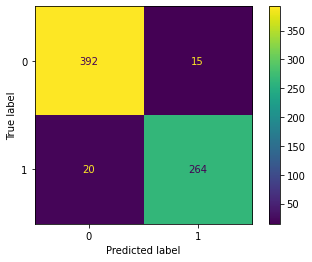

In [219]:
print(cr(y_test3, predictedxgb3))
cm3 = confusion_matrix(y_test3, predictedxgb3)
cm_display = ConfusionMatrixDisplay(cm3).plot()

## We have managed to reduce the hams being classified as spams